In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

# Exploratory analysis - Taking a look to the raw data:

## transcript.json

transcript.columns - ['event', 'person', 'time', 'value']

event- ['offer received', 'offer viewed', 'transaction', 'offer completed']

## protfolio.json

portfolio.columns - ['channels', 'difficulty', 'duration', 'id', 'offer_type', 'reward']

## profile.json

profile.columns - ['age', 'became_member_on', 'gender', 'id', 'income']
   




How many users with no info? 

age                 2175
became_member_on    2175
gender                 0
id                  2175
income                 0
dtype: int64

 2175 users with 118 years old, and no information of gender and no income


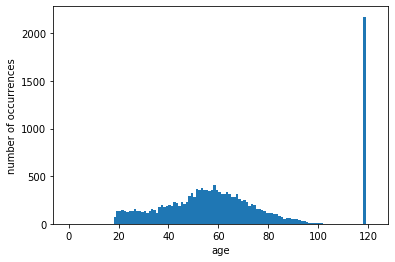

In [4]:
#histogram of user's age
plt.hist(profile['age'],bins=np.arange(profile['age'].max()+5))
plt.xlabel('age')
plt.ylabel('number of occurrences')
no_info=profile[profile['age']==118].count()

print('How many users with no info? \n')
print(no_info)

print('\n 2175 users with 118 years old, and no information of gender and no income')


In [12]:
print(profile.count())
print('\n We may consider to work only with 14825 users.')

age                 17000
became_member_on    17000
gender              14825
id                  17000
income              14825
dtype: int64

 We may consider to work only with 14825 users.


New profile shape:
(14825, 5)


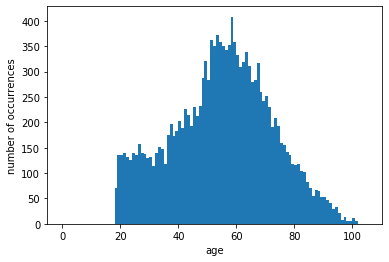

In [6]:
#lets filter the profile data frame
plt.figure()
plt.hist(profile['age'],bins=np.arange(profile['age'].max()+5))
plt.xlabel('age')
plt.ylabel('number of occurrences')
profile=profile[profile['age']!=118]
print('New profile shape:')
print(profile.shape)

In [19]:
#taking a look at became_member_on column:

member_since=len(profile['became_member_on'].unique())
print('How many different values of became_member_on?')
print(member_since)
print('Looks like some users became member on the same day.')


How many different values of became_member_on?
1707
Looks like some users became member on the same day.


In [78]:
same_day_count=profile.groupby(by='became_member_on').count().sort_values(by='id')['id']
print('Became member on the same day?')
same_day_count.tail(20)


Became member on the same day?


became_member_on
20170921    31
20171217    31
20171025    31
20170911    31
20171114    31
20170815    31
20170806    31
20180120    31
20170821    31
20171113    32
20171019    32
20180109    32
20171214    32
20171121    32
20171212    33
20171010    34
20180125    35
20171207    36
20171007    37
20170819    39
Name: id, dtype: int64

In [77]:
print('Users that became member on 20170819:\n')
print(profile[profile['became_member_on']==20170819].loc[:,['age','gender','income']])

Users that became member on 20170819:

       age  gender    income
733     72       2   49000.0
1715    40       1   69000.0
2376    59       1  105000.0
2581    47       2   62000.0
3593    73       1   53000.0
4002    32       2   71000.0
4028    50       2   55000.0
4124    38       2   86000.0
4249    68       1  106000.0
4947    70       2   51000.0
5412    77       1  105000.0
6349    83       2  110000.0
6709    55       2   31000.0
6773    70       2   67000.0
7023    71       2   89000.0
7344    59       2   67000.0
8534    58       1   77000.0
8702    63       2   31000.0
9802    94       2   74000.0
10022   33       1   30000.0
10157   74       2   85000.0
10877   82       1  115000.0
11423   88       1  109000.0
11438   36       2   45000.0
11656   61       1   98000.0
11761   46       2   47000.0
11854   49       2   85000.0
11931   46       1  100000.0
13668   48       2   76000.0
13792   46       2   62000.0
13836   57       1   74000.0
13961   51       2   58000.0
1397

In [38]:
#lets filter the transcript data frame to 14825 users with info
filter_users=profile['id'].unique()
filter_transcript=transcript[transcript['person'].isin(filter_users)]
print('Percentage of data that have been filtered:')
print((transcript.shape[0]-filter_transcript.shape[0])/transcript.shape[0])
print('\nHow many transcripts remain?')
print(transcript.count())

Percentage of data that have been filtered:
0.11017374907840566

How many transcripts remain?
event     306534
person    306534
time      306534
value     306534
dtype: int64


In [41]:
#extract id from transcript['value'] in case of 'offer completed'
event_completed=filter_transcript[filter_transcript['event']=='offer completed']\
    .loc[:,['event','time','value','person']]
event_completed_values=list(event_completed['value'].values)
extract_completed=(lambda x:x['offer_id'])
ids=pd.Series(pd.Series(event_completed_values).map(extract_completed))
print('How many cases of offer_completed for each offer_type?')
print(len(ids[ids=='ae264e3637204a6fb9bb56bc8210ddfd']))
print(len(ids[ids=='4d5c57ea9a6940dd891ad53e9dbe8da0']))
print(len(ids[ids=='3f207df678b143eea3cee63160fa8bed']))
print(len(ids[ids=='9b98b8c7a33c4b65b9aebfe6a799e6d9']))
print(len(ids[ids=='0b1e1539f2cc45b7b9fa7c272da2e1d7']))
print(len(ids[ids=='2298d6c36e964ae4a3e7e9706d1fb8c2']))
print(len(ids[ids=='fafdcd668e3743c1bb461111dcafc2a4']))
print(len(ids[ids=='5a8bc65990b245e5a138643cd4eb9837']))
print(len(ids[ids=='f19421c1d4aa40978ebb69ca19b0e20d']))
print(len(ids[ids=='2906b810c7d4411798c6938adc9daaa5']))

How many cases of offer_completed for each offer_type?
3657
3310
0
4188
3386
4886
5003
0
4103
3911


In [42]:
print('How many differente persons have offer_completed?')
print(event_completed['person'].nunique())

How many differente persons have offer_completed?
11986


Informational does not have completed offer, since it finishes with a transaction
inside the influence period.

11986 from 14825 persons completed offer. 
Are they influenced by the offer? 
Did these customers view the offer? 

Let's take the filtered data and apply the user_evaluate function to each user 
in order to obtain the features and labels for the classification algorithm

# Implementation of user_evaluate function:

In [44]:
def user_evaluate(user):
    
    ''' 
The transcripts of a given user can fit into the following possible scenarios:  
1-received an offer (bogo or discount), viewed, bought on time, completed an offer: y [i] = 1
2-received an offer (informational), viewed, bought on time: y [i] = 1
3-received an offer, viewed, bought (purchased late): y [:] = 0
4-received an offer, viewed, did not buy, did not complete an offer: y [:] = 0
5-received an offer, did not view, bought, completed offer: y [:] = 0
6-received an offer, did not view, bought (purchased late): y [:] = 0
7-received an offer, did not view, did not buy, did not complete an offer: y [:] = 0
8-other cases : y[:]=0
    
y[i]=1 : i depends on which of the 10 possible offers (from the portfolio) that was received, as following index:


      offer_type                                id      
y[0]           bogo  ae264e3637204a6fb9bb56bc8210ddfd   
y[1]           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0   
y[2]           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9   
y[3]           bogo  f19421c1d4aa40978ebb69ca19b0e20d   
y[4]       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7   
y[5]       discount  2298d6c36e964ae4a3e7e9706d1fb8c2   
y[6]       discount  fafdcd668e3743c1bb461111dcafc2a4   
y[7]       discount  2906b810c7d4411798c6938adc9daaa5   
y[8]  informational  3f207df678b143eea3cee63160fa8bed   
y[9]  informational  5a8bc65990b245e5a138643cd4eb9837   
  
Next, in the classification algorithm, different user profiles (features) are evaluated to predict which 
promotions (labels) are most suitable for that features, it means, a classification algorithm that predicts 
whether or not someone will respond to an offer.

The following algorithm of user_evaluate function is according to:

    Given an user id
    Loop through the user`s transcript
    If event = offer received 
        If offer type is bogo or discount
            What is it period of influence?
            Take the receipt date and compute the limit date to complete the offer
            Loop through the next events 
                If the user viewed this promo
                    Loop through the next events
                        If this offer completed on time (limit date)
                            y[i]=1
        If offer type is informational
            What is it period of influence?
            Take the receipt date and compute the limit date to complete the offer
            Loop through the next events 
                If the user viewed this informational
                    Loop through the next events
                        If transaction on time (limit date)
                            y[i]=1
    Add the user`s infos in the features list
    Add the y vector in the labels list
                            
    '''
    
    teste=filter_transcript[filter_transcript['person']==user]\
            .loc[:,['event','time','value']].sort_values(by='time')         
    y_user=[0,0,0,0,0,0,0,0,0,0]
    cont=-1
    for events in list(teste['event']):
        cont=cont+1
        if events=='offer received':
            promo=list(teste['value'])[cont]['offer id']
            if promo in list_promos:
                duration=portfolio[portfolio['id']==promo]['duration']\
                    .values[0]*24 #now in hours
                received_at=list(teste['time'])[cont] #hours
                valid=received_at+duration
                cont_two=cont-1
                for events_two in (list(teste['event'])[cont:]):
                    cont_two=cont_two+1
                    if events_two=='offer viewed':
                        promo_two=list(teste['value'])[cont_two]['offer id']
                        if promo_two==promo:
                            cont_three=cont_two-1
                            for events_three in (list(teste['event'])[cont_two:]):
                                cont_three=cont_three+1
                                if events_three=='offer completed':
                                    promo_three=list(teste['value'])[cont_three]['offer_id']
                                    date_buy=list(teste['time'])[cont_three]
                                    if promo_three==promo and date_buy<=valid:
                                        indx=np.where(all_promos==promo)
                                        y_user[indx[0][0]]=1    
                                        break
            if promo in list_informational:
                duration=portfolio[portfolio['id']==promo]['duration']\
                    .values[0]*24 #now in hours
                received_at=list(teste['time'])[cont] #hours
                valid=received_at+duration
                cont_two=cont-1
                for events_two in (list(teste['event'])[cont:]):
                    cont_two=cont_two+1
                    if events_two=='offer viewed':
                        promo_two=list(teste['value'])[cont_two]['offer id']
                        if promo_two==promo:
                            cont_three=cont_two-1
                            for events_three in (list(teste['event'])[cont_two:]):
                                cont_three=cont_three+1
                                if events_three=='transaction': 
                                    date_buy=list(teste['time'])[cont_three]
                                    if date_buy<=valid:
                                        indx=np.where(all_promos==promo)
                                        y_user[indx[0][0]]=1    
                                        break
    y_train_test.append(np.array(y_user))
    x_train_test.append(np.array(profile[profile['id']==user]\
                                 .loc[:,['age','gender','income','became_member_on']]\
                                     .values[0]))

In [46]:
list_promos=np.array(['ae264e3637204a6fb9bb56bc8210ddfd','4d5c57ea9a6940dd891ad53e9dbe8da0',\
           '9b98b8c7a33c4b65b9aebfe6a799e6d9','f19421c1d4aa40978ebb69ca19b0e20d',\
               '0b1e1539f2cc45b7b9fa7c272da2e1d7','2298d6c36e964ae4a3e7e9706d1fb8c2',\
                   'fafdcd668e3743c1bb461111dcafc2a4','2906b810c7d4411798c6938adc9daaa5',])
list_informational=np.array(['3f207df678b143eea3cee63160fa8bed',\
                             '5a8bc65990b245e5a138643cd4eb9837'])   
all_promos=np.array(['ae264e3637204a6fb9bb56bc8210ddfd','4d5c57ea9a6940dd891ad53e9dbe8da0',\
           '9b98b8c7a33c4b65b9aebfe6a799e6d9','f19421c1d4aa40978ebb69ca19b0e20d',\
               '0b1e1539f2cc45b7b9fa7c272da2e1d7','2298d6c36e964ae4a3e7e9706d1fb8c2',\
                   'fafdcd668e3743c1bb461111dcafc2a4','2906b810c7d4411798c6938adc9daaa5',\
                       '3f207df678b143eea3cee63160fa8bed',\
                           '5a8bc65990b245e5a138643cd4eb9837'])

# Example of user_evaluate function results:

In [62]:
'''
more example users to test:
'43fbc1418ee14268a5d3797006cc69be'
'0610b486422d4921ae7d2bf64640c50b'
'78afa995795e4d85b5d9ceeca43f5fef'
'e2127556f4f64592b11af22de27a7932' 
'01d26f638c274aa0b965d24cefe3183f'
'9dc1421481194dcd9400aec7c9ae6366'
'e4052622e5ba45a8b96b59aba68cf068'  
''' 

x_train_test=[]
y_train_test=[] 
user='78afa995795e4d85b5d9ceeca43f5fef'  #checking the results to this user
user_evaluate(user)

In [64]:
print('The log of transcripts from this user is:')
filter_transcript[filter_transcript['person']==user]\
            .loc[:,['event','time','value']].sort_values(by='time') 

The log of transcripts from this user is:


,event,time,value
0,offer received,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
15561,offer viewed,6,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
47582,transaction,132,{'amount': 19.89}
47583,offer completed,132,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
49502,transaction,144,{'amount': 17.78}
53176,offer received,168,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
85291,offer viewed,216,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
87134,transaction,222,{'amount': 19.67}
92104,transaction,240,{'amount': 29.72}
141566,transaction,378,{'amount': 23.93}


In [74]:
print('The user_evaluate function return that this user is indicated to these promos:')
print('y={}'.format(list(np.array(y_train_test).reshape(-1))))

The user_evaluate function return that this user is indicated to these promos:
y=[1, 0, 1, 0, 0, 0, 0, 0, 0, 1]


      
y[i]     offer_type :                    id  

y[0]           bogo : ae264e3637204a6fb9bb56bc8210ddfd   
y[1]           bogo : 4d5c57ea9a6940dd891ad53e9dbe8da0   
y[2]           bogo : 9b98b8c7a33c4b65b9aebfe6a799e6d9   
y[3]           bogo : f19421c1d4aa40978ebb69ca19b0e20d   
y[4]       discount : 0b1e1539f2cc45b7b9fa7c272da2e1d7   
y[5]       discount : 2298d6c36e964ae4a3e7e9706d1fb8c2   
y[6]       discount : fafdcd668e3743c1bb461111dcafc2a4   
y[7]       discount : 2906b810c7d4411798c6938adc9daaa5   
y[8]  informational : 3f207df678b143eea3cee63160fa8bed   
y[9]  informational : 5a8bc65990b245e5a138643cd4eb9837 

The user received, viewed and completed the y[0] and y[2] bogo promos.
Also, the user received, viewed and make a transaction during the influence period of 'informational' y[9].
The y[3] bogo is not indicated because the user just viewed after completed.

# Loop through all users in the function user_evaluate:

In [75]:
#mapping 'gender' from str to int, in order to use it in the classifier
# F -> 1
# M -> 2
# O -> 3
profile['gender']=profile['gender'].map(lambda x:1 if x =='F' else (2 if x=='M' else 3))

In [76]:
#Including a progress bar and going through the loop

import time
import progressbar
with progressbar.ProgressBar(max_value=len(list(filter_users))) as bar:
    contbar=0
    for user in list(filter_users):    
        user_evaluate(user)
        bar.update(contbar)
        contbar=contbar+1

100% (14825 of 14825) |##################| Elapsed Time: 0:07:22 Time:  0:07:22


# Saving the data with features (users infos) and labels (promos indications to each user):

In [81]:
import pickle
with open('features.pkl', 'wb') as file:
    pickle.dump(x_train_test, file)
    
with open('labels.pkl', 'wb') as file:
    pickle.dump(y_train_test, file)